<a href="https://www.kaggle.com/code/sashankvemulapalli/ann-to-classify-obesity?scriptVersionId=177649754" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                            
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation 
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-05-14 16:23:43.873627: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 16:23:43.873775: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 16:23:44.042267: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/obesity-classification-dataset/Obesity Classification.csv


In [2]:
df = pd.read_csv("/kaggle/input/obesity-classification-dataset/Obesity Classification.csv")
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [3]:
df = df.drop(columns = ['ID'])
df = pd.get_dummies(df, columns = ['Gender'])
df['Gender_Male'] = df['Gender_Male'].astype(int)
df['Gender_Female'] = df['Gender_Female'].astype(int)

In [4]:
X = df.drop('Label', axis=1)  # Features
y = df['Label']  # Target variable

In [5]:
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
Y_train = to_categorical(y_train, 4)
Y_test = to_categorical(y_test, 4)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
model = Sequential()
model.add(Dense(32)) 
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(32)) 
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(4))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
%load_ext tensorboard
log_dir = "/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [10]:
history = model.fit(X_train, Y_train,
        epochs=200,
          verbose=1, callbacks=[tensorboard_callback])

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.1907 - loss: 1.4068
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2257 - loss: 1.3792
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2606 - loss: 1.3423
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4085 - loss: 1.3017
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3833 - loss: 1.2592
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4535 - loss: 1.2364
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5292 - loss: 1.1878
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4688 - loss: 1.1299
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6070 - loss: 1.1337
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4921 - loss: 1.1078
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6147 - loss: 1.0404
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6538 - lo

In [11]:
%tensorboard --logdir /logs/fit

In [12]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.8636 - loss: 0.3594
Test accuracy: 0.8636363744735718


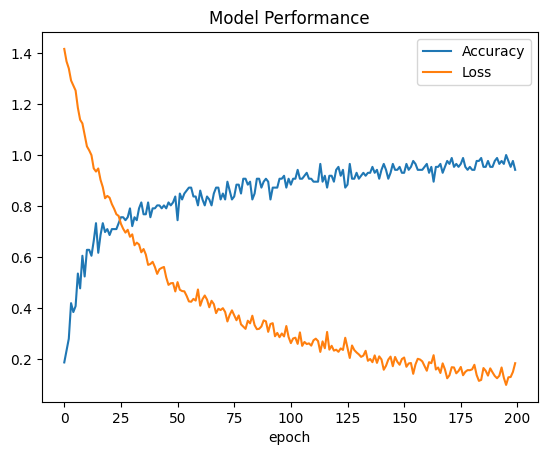

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Performance')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper right')
plt.show()